In [123]:
#Imporing the libraries

import numpy as np
import datetime
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [124]:
#Importing the data files

account = pd.read_csv('pkdd99_database/account.asc', sep=';')
card = pd.read_csv('pkdd99_database/card.asc', sep=';')
client = pd.read_csv('pkdd99_database/client.asc', sep=';')

In [125]:
#Defining the starting and end dates
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(1999,1,1)

In [126]:
# function to convert a date to (days after start_date)
def convert_date_to_days(x):
    td = x - start_date
    return td.days

In [127]:
# function to convert a date to age at end_date
def convert_to_age_days(x):
    td = end_date - x
    return td.days

In [128]:
#Converting the Card issued date to a datetime object

card['issued'] = pd.to_datetime(card['issued'].str[:6], format='%y%m%d')

In [129]:
# check the date column for null values

card['issued'].isnull().sum()

0

In [130]:
#Convert the card issued date to days in number
card['card_issued_date'] = card['issued'].map(convert_date_to_days)
del card['issued']

In [131]:
# functions to convert the format of the birth_number.

# returns the middle two digits

def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number column.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# return the month (of birth_number)
def get_day(x):
    return x % 100

# returns the year (of birth_number)
def get_year(x):
    return int(x/10000)

# determine the gender 
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# convert the birth_number into date
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

# convert birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365
    
client['client_age'] = client['birth_number'].map(convert_birthday_to_age)
client['client_gender'] = client['birth_number'].map(get_gender)
del client['birth_number']

In [132]:
# rename columns in Card
card = card.rename(columns={'type': 'card_type'})
card.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


In [133]:
# Rename columns in Client dataset.
client = client.rename(columns={'district_id': 'client_district_id'})
client.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,28.071233,F
1,2,1,53.942466,M
2,3,1,58.268493,F
3,4,5,42.112329,M
4,5,5,38.523288,F


In [134]:
# Export the cleaned Client Data set
client.to_csv("cleaned_client.csv", index=False)

(array([  6., 150., 426., 345., 387., 358., 382., 372., 344., 371., 372.,
        392., 367., 254., 205., 189., 186., 185.,  66.,  12.]),
 array([11.27123288, 15.0790411 , 18.88684932, 22.69465753, 26.50246575,
        30.31027397, 34.11808219, 37.92589041, 41.73369863, 45.54150685,
        49.34931507, 53.15712329, 56.96493151, 60.77273973, 64.58054795,
        68.38835616, 72.19616438, 76.0039726 , 79.81178082, 83.61958904,
        87.42739726]),
 <BarContainer object of 20 artists>)

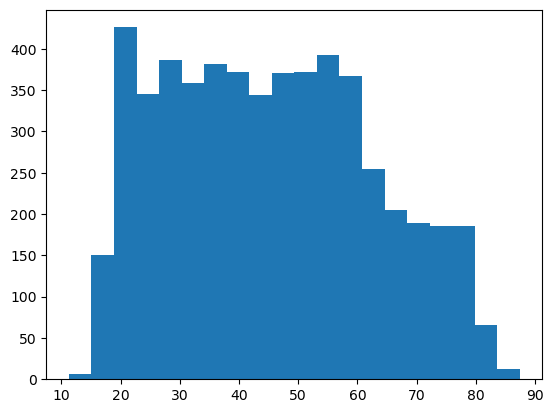

In [135]:
#Plotting age of clients
plt.hist(client['client_age'], 20)

array([<AxesSubplot: title={'center': 'client_gender'}>], dtype=object)

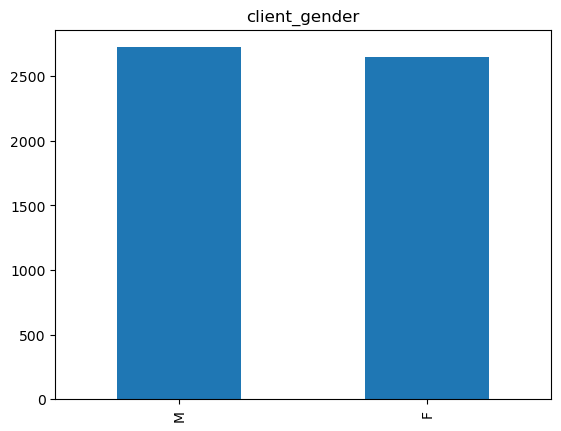

In [136]:
#Plotting gender of clients
client['client_gender'].value_counts().plot(kind='bar', subplots=True)

In [137]:
# Renaming columns for Account
account = account.rename(columns={'district_id': 'account_district_id'})

account.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [138]:
#Converting date columns in the Account table
account['date'] = account['date'].map(convert_int_to_date)
account['account_date_opened'] = account['date'].map(convert_date_to_days)
del account['date']

In [139]:
#Checking the frequency ofAccount table
account['frequency'].value_counts()

POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: frequency, dtype: int64

In [140]:
# Translate frequency of transactions to English.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account['frequency'] = account['frequency'].map(convert_freq_to_eng)

In [141]:
# Renaming columns for Account

account = account.rename(columns={'frequency': 'statement_freq'})
account.head()

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


In [142]:
# Export the cleaned Account Data set
account.to_csv("cleaned_account.csv", index=False)

In [143]:
# Export the cleaned Card Data set
card.to_csv("cleaned_card.csv", index=False)

In [144]:

loan = pd.read_csv('pkdd99_database/loan.asc', sep=';')

In [145]:
combined_data = pd.merge_ordered(account, loan, on='account_id', how='left')
features = ['account_id', 'loan_id', 'account_district_id', 'statement_freq', 'account_date_opened', 'amount', 'duration', 'payments']
data_for_model = combined_data[features + ['status']].dropna() 
combined_data

,account_id,account_district_id,statement_freq,account_date_opened,loan_id,date,amount,duration,payments,status
0,1,18,MONTHLY,812,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,MONTHLY,56,4959.0,940105.0,80952.0,24.0,3373.0,A
2,3,5,MONTHLY,1648,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12,MONTHLY,1146,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15,MONTHLY,1610,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4495,11333,8,MONTHLY,510,NaN,NaN,NaN,NaN,NaN,NaN
4496,11349,1,WEEKLY,875,7304.0,951029.0,419880.0,60.0,6998.0,C
4497,11359,61,MONTHLY,638,7305.0,960806.0,54024.0,12.0,4502.0,A
4498,11362,67,MONTHLY,1016,7308.0,961227.0,129408.0,24.0,5392.0,A


In [146]:
data_for_model.to_csv("data_4_model_Loan-Service.csv", index=False)
data_for_model

,account_id,loan_id,account_district_id,statement_freq,account_date_opened,amount,duration,payments,status
1,2,4959.0,1,MONTHLY,56,80952.0,24.0,3373.0,A
18,19,4961.0,21,MONTHLY,826,30276.0,12.0,2523.0,B
24,25,4962.0,68,MONTHLY,1304,30276.0,12.0,2523.0,A
35,37,4967.0,20,MONTHLY,1690,318480.0,60.0,5308.0,D
36,38,4968.0,19,WEEKLY,1680,110736.0,48.0,2307.0,C
...,...,...,...,...,...,...,...,...,...
4493,11327,7294.0,7,MONTHLY,1748,39168.0,24.0,1632.0,C
4494,11328,7295.0,54,MONTHLY,1404,280440.0,60.0,4674.0,C
4496,11349,7304.0,1,WEEKLY,875,419880.0,60.0,6998.0,C
4497,11359,7305.0,61,MONTHLY,638,54024.0,12.0,4502.0,A


'A' stands for contract finished, no problems,

'B' stands for contract finished, loan not payed,

'C' stands for running contract, OK so far,

'D' stands for running contract, client in debt

In [147]:
# Verificando se 'data_for_model' é um DataFrame
if not isinstance(data_for_model, pd.DataFrame):
    data_for_model = pd.DataFrame(data_for_model, columns=['account_id', 'loan_id', 'account_district_id', 'statement_freq', 'account_date_opened', 'amount', 'duration', 'payments', 'status'])

In [148]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = data_for_model.drop('status', axis=1)
# Aplicando one-hot encoding na coluna 'statement_freq'
X = pd.get_dummies(X, columns=['statement_freq'], drop_first=True)

y = data_for_model['status']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Pré-processamento: Normalizando as variáveis
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
# Criando e treinando o modelo (RandomForestClassifier) com pesos de classe
class_weights = {'A': 1, 'B': 10, 'C': 1, 'D': 10}  
model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

In [151]:
# Avaliando o desempenho do modelo
print("Acurácia:", accuracy_score(y_test, predictions))
print("Relatório de Classificação:\n", classification_report(y_test, predictions))

Acurácia: 0.781021897810219
Relatório de Classificação:
               precision    recall  f1-score   support

           A       0.83      0.71      0.77        42
           B       0.00      0.00      0.00         5
           C       0.79      0.97      0.87        79
           D       0.00      0.00      0.00        11

    accuracy                           0.78       137
   macro avg       0.40      0.42      0.41       137
weighted avg       0.71      0.78      0.74       137

